In [2]:
using ProRF, Printf

In [4]:
R = RF("Data/Pab1")
RI = RFI(R, 8:1:20, 100:1:100)
X, Y, L = get_data(R, 'B');
Y = min_max_norm(log.(Y));

In [38]:
size(X)

(112587, 75)

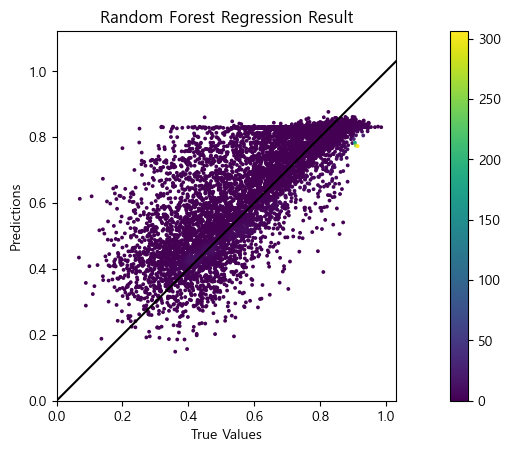

NRMSE : 0.071489


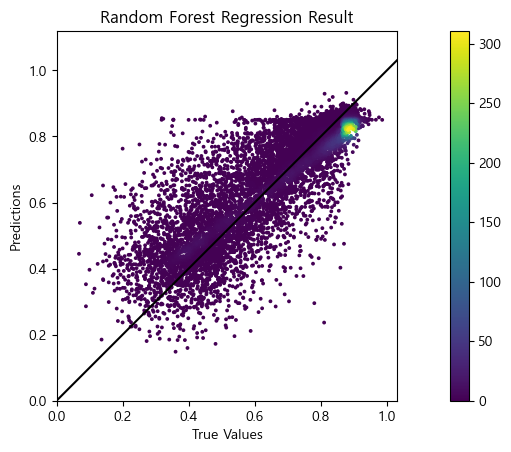

NRMSE : 0.061445


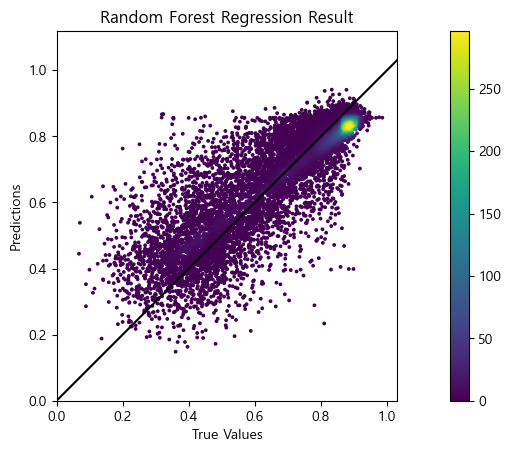

NRMSE : 0.061285


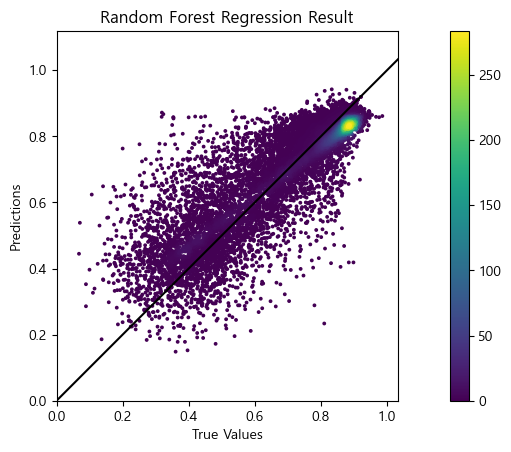

NRMSE : 0.061256


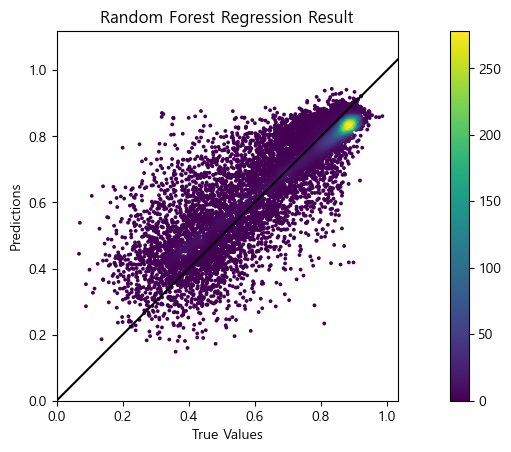

NRMSE : 0.061189


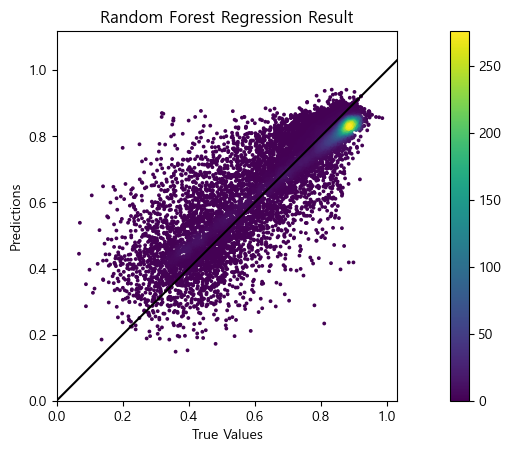

NRMSE : 0.061208


In [5]:
data_state, learn_state = @seed, @seed
nrmse_vector = Vector{Float64}()
for d in 50:50:300
    push!(nrmse_vector, rf_nrmse(X, Y, 9, 200, max_depth=d, data_state=data_state, learn_state=learn_state)[2])
end

In [7]:
F = rf_importance(R, M, X, L, imp_iter=1)

In [36]:
data_state, learn_state = @seed, @seed

(0xd7c2c78b36655d32, 0x58997616b8d05a10)

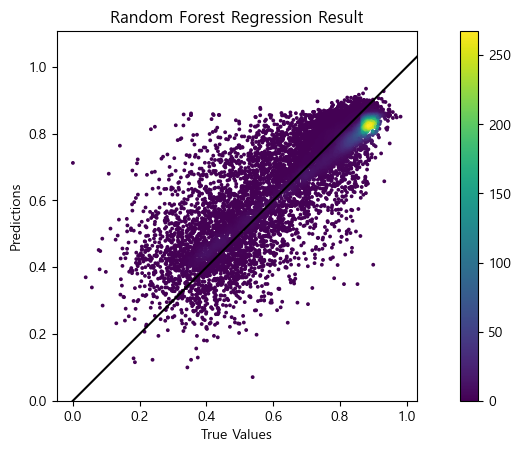

NRMSE : 0.057958


RandomForestRegressor
n_trees:             200
n_subfeatures:       8
partial_sampling:    0.7
max_depth:           150
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            Ensemble of Decision Trees
Trees:      200
Avg Leaves: 10912.68
Avg Depth:  150.0

In [35]:
M = rf_model(X, Y, 2, 200, max_depth=150, data_state=data_state, learn_state=learn_state)